In [96]:
#importing liabraries we need in our predectif model
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score

In [97]:
#loading data
titanic_path=("D:/2020/go my code/checkpoint3/titanic-passengers.csv")
titanic_data=pd.read_csv(titanic_path, encoding="ISO-8859-1", sep=";")
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,NaN,C
888,535,No,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,NaN,S
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,NaN,0,0,349215,7.8958,NaN,S


In [98]:
#Preprocessing data
def preprocess_data(new_data):
    new_data['Age'].fillna(new_data['Age'].mean(), inplace=True)
    new_data.replace({'Sex':{'male':1, 'female':0}}, inplace=True)
    new_data['Cabin']=new_data.Cabin.fillna('G6')
    new_data.replace({'Survived':{'Yes':1,'No':0}}, inplace=True)
    return new_data
data=preprocess_data(titanic_data)

    

In [99]:
#Features extraction
x=titanic_data.drop(['Survived','Name','Cabin','Ticket','Embarked'], axis=1)
y=titanic_data['Survived']

#splitting data
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2, random_state=10)

#Applying tree algorith
tree_d=DecisionTreeClassifier(max_depth = 2)
tree_d.fit(x_train, y_train)
y_pred=tree_d.predict(x_test)
print("score:{}".format(accuracy_score(y_test,y_pred)))

score:0.770949720670391


In [22]:
y_train.value_counts()

0    444
1    268
Name: Survived, dtype: int64

In [106]:
#Showing the selected features 
x

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,343,2,1,28.000000,0,0,13.0000
1,76,3,1,25.000000,0,0,7.6500
2,641,3,1,20.000000,0,0,7.8542
3,568,3,0,29.000000,0,4,21.0750
4,672,1,1,31.000000,1,0,52.0000
...,...,...,...,...,...,...,...
886,10,2,0,14.000000,1,0,30.0708
887,61,3,1,22.000000,0,0,7.2292
888,535,3,0,30.000000,0,0,8.6625
889,102,3,1,29.699118,0,0,7.8958


## Plotting the decision tree 

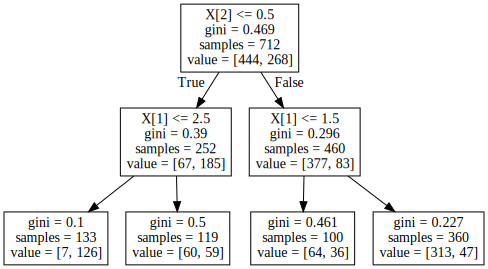

In [66]:
import graphviz
dot_data=tree.export_graphviz(tree_d, out_file=None)
graph=graphviz.Source(dot_data)
graph.render("titanic_data")
graph

# reading the tree branches and concluding a predicition manually

the root node which is the most important attribute used to make predicition is "sex" attribute. Tree branches represent the outcome of the splitting test, it is a binary test based on a binary comparator, if test value is inferior or equal to 0.5 which means that the passenger is a female the the branch value is True, otherwise if the root node test value is above 0.5 (male passenger) then the brach value is False
## Concluding a prediction manually :
If randomly we get a female passenger travelling in the class 1 then based on our decision tree we can conclude that she most likely to be within 126 survived first or second class females from 133 which means she has 95% chance to be survived 

In [24]:
(126/133)*100

94.73684210526315

In [13]:
conda install python-graphviz

Note: you may need to restart the kernel to use updated packages.

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\samsung\anaconda3

  added / updated specs:
    - python-graphviz


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.9.1                |   py38h9f7ea03_0         2.9 MB
    graphviz-2.38              |       hfa6e2cd_3        29.1 MB
    python-graphviz-0.14.2     |             py_0          20 KB
    ------------------------------------------------------------
                                           Total:        32.0 MB

The following NEW packages will be INSTALLED:

  graphviz           pkgs/main/win-32::graphviz-2.38-hfa6e2cd_3
  python-graphviz    pkgs/main/noarch::python-graphviz-0.14.2-py_0

The following packages will be UPDATED:

  conda                                        4.8.3-py38_0 --> 4.9.1-py38h9f7ea0

# 3. Changing the decision tree parameters 

In [67]:
dtree=tree.DecisionTreeClassifier(criterion="gini",splitter='random', max_leaf_nodes=4, min_samples_leaf=50,max_depth=4)

# 4. Calculating the new accuracy score 

In [68]:
#Features extraction
x=titanic_data.drop(['Survived','Name','Cabin','Ticket','Embarked'], axis=1)
y=titanic_data['Survived']

#splitting data
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2, random_state=10)

#Applying tree algorith
dtree.fit(x_train, y_train)
y_pred=dtree.predict(x_test)
print("score:{}".format(accuracy_score(y_test,y_pred)))

score:0.770949720670391


## Comparing the accuracy after changing parameters
I set the splitter as 'random', max leaf nodes as 4 min samples leaf as 50 the I applied the new tree decision tree and I noticed that the accuracy score value =0.77094 doesn't change. the tow decision trees have the same accuracy and tunning the splitting parameters doesn't affect their accuracy 


### Plot the second decision tree 

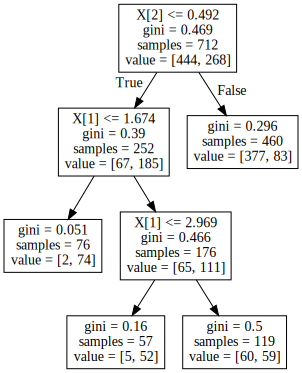

In [60]:
import graphviz
dot_data=tree.export_graphviz(dtree, out_file=None)
graph=graphviz.Source(dot_data)
graph.render("titanic_data")
graph

# 5.Using random forest prediction model 

In [100]:
from sklearn import metrics # Importing metrics to test accuracy 
from sklearn.ensemble import RandomForestClassifier # importing the random forest classifier 

#Apllying the random forest model to our data 
clf=RandomForestClassifier(n_estimators=10)
clf.fit(x_train, y_train)
y_=clf.predict(x_test)
print("Accuracy : ", metrics.accuracy_score(y_test, y_))

Accuracy :  0.8435754189944135


### Comparing accuracy between random forest and decision tree
random forest accuracy=0.82 > decision tree accuracy=0.77

### Changing the number of estimators 

In [101]:
clf=RandomForestClassifier(n_estimators=100)
clf.fit(x_train, y_train)
y_=clf.predict(x_test)
print("Accuracy : ", metrics.accuracy_score(y_test, y_))

Accuracy :  0.8547486033519553


In [102]:
clf=RandomForestClassifier(n_estimators=5)
clf.fit(x_train, y_train)
y_=clf.predict(x_test)
print("Accuracy : ", metrics.accuracy_score(y_test, y_))

Accuracy :  0.8100558659217877


In [105]:
clf=RandomForestClassifier(n_estimators=70)
clf.fit(x_train, y_train)
y_=clf.predict(x_test)
print("Accuracy : ", metrics.accuracy_score(y_test, y_))

Accuracy :  0.8770949720670391


# 6.Comparing accuracy  with previous results 

we notice that by changing the n_estimatos parameter (number of built trees for avaerage prediction) w can get better accuracy result, for example accuracy with n_estimator of 70 is higher then accuracy with 10, 100 or 5 n_estimators. the lowest accuracy score is with the lowest n_estimators number=5 
